In [1]:
import sys
sys.path.append('../code/')

In [2]:
%load_ext autoreload
%autoreload 2

from libs import io
from libs import constants
from libs import vis
from libs import helpers
from postprocessing import bias

# Setup

In [3]:
FACTUALITY_PATH = '../results/factuality'
APS_OA_DATA_TAR_GZ = '../../APS/data/final_dataset.tar.gz'
APS_OS_DISCIPLINE_DEMOGRAPHICS = '../results/metadata/disciplines_author_demographics.csv'
PLOTS_PATH = '../results/plots'

In [4]:
vis.sns_reset()
vis.sns_paper_style()

## Data

In [5]:
df_llm_real_authors = io.pd.concat([io.read_csv(io.path_join(FACTUALITY_PATH, f"{model}_author.csv"), index_col=0) for model in constants.LLMS], ignore_index=True)
df_llm_real_authors.shape

(147622, 32)

In [6]:
df_all_authors_demographics = io.read_file_from_tar_gz_as_dataframe(APS_OA_DATA_TAR_GZ, constants.APS_OA_AUTHORS_DEMOGRAPHICS_FN)
df_all_authors_demographics.shape

(481012, 20)

In [7]:
df_gt_stats = io.read_csv(APS_OS_DISCIPLINE_DEMOGRAPHICS, index_col=0, header=[0, 1])
df_gt_stats.shape

(17, 19)

# Ground-truth (APS-OA)

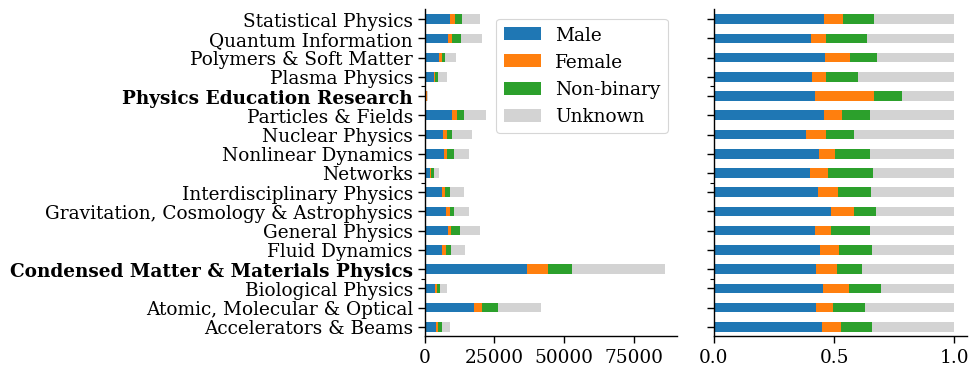

In [8]:
attribute = 'gender'
fn = io.path_join(PLOTS_PATH, f'gt_demographics_{attribute}.pdf')
vis.plot_gt_demographics(df_gt_stats, attribute, fn, figsize=(10, 4))

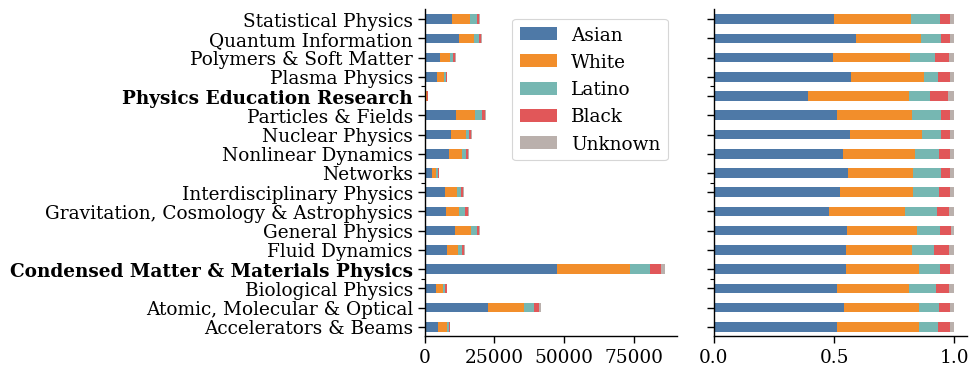

In [9]:
attribute = 'ethnicity'
fn = io.path_join(PLOTS_PATH, f'gt_demographics_{attribute}.pdf')
vis.plot_gt_demographics(df_gt_stats, attribute, fn, figsize=(10, 4))

## In LLM results

### Gender 

#### Across all tasks

In [10]:
cat_col = 'gender'
df_model_gender, df_task_gender = bias.get_mean_percentages(df_llm_real_authors, cat_col, {cat_col:constants.GENDER_LIST})
df_model_gender.head(2)

,model,gender,mean,std
0,gemma2-9b,Male,0.703704,0.228722
1,gemma2-9b,Female,0.037037,0.052472


/Users/espinl/Documents/CODE/LLM-project/LLMScholar-WWW24/Auditor/notebooks/../code/libs/helpers.py:34: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tmp = df.pivot_table(index=index_col, columns=columns_col, values=values_col).T.reset_index()
/Users/espinl/Documents/CODE/LLM-project/LLMScholar-WWW24/Auditor/notebooks/../code/libs/helpers.py:34: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tmp = df.pivot_table(index=index_col, columns=columns_col, values=values_col).T.reset_index()
/Users/espinl/Documents/CODE/LLM-project/LLMScholar-WWW24/Auditor/notebooks/../code/libs/vis.py:302: FutureWarning: The default of observed=False is deprecated and will be changed to T

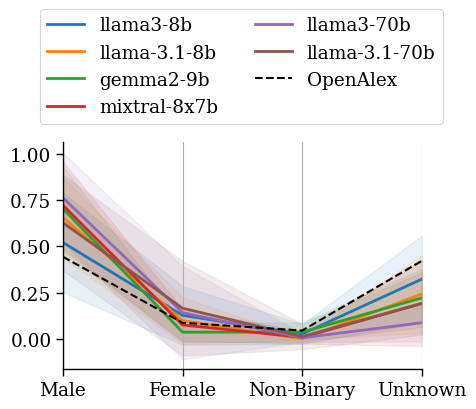

In [11]:
fname = f'bias_{cat_col}.pdf'
fn = io.path_join(PLOTS_PATH, fname.replace('.pdf','_parallel_coords.pdf'))

x_col = cat_col
x_order = constants.GENDER_LIST
hue = 'model'
hue_order = constants.LLMS
hue_colors = constants.LLMS_COLORS
mean_col = 'mean'
std_col = 'std'

baselines, baselines_with_unknownn = bias.get_baselined_from_gt(df_all_authors_demographics, cat_col, x_order)
df_gender_mean_t = helpers.pivot_model_tasks(df_model_gender, index_col=x_col, columns_col=hue, values_col=mean_col, x_order=x_order, hue_order=hue_order)
df_gender_std_t = helpers.pivot_model_tasks(df_model_gender, index_col=x_col, columns_col=hue, values_col=std_col, x_order=x_order, hue_order=hue_order)
vis.plot_parallel_coords(df_gender_mean_t, hue=hue, hue_order=hue_order, hue_colors=hue_colors,
                         df_err=df_gender_std_t, 
                         legend_kwargs = constants.PLOT_LEGEND_KWARGS_PARALLEL_COORD,
                         figsize=constants.PLOT_FIGSIZE,
                         xticklabels_rename={'Unisex':'Non-Binary','Male':'Male','Female':'Female','Unknown':'Unknown'},
                         baselines={#'OpenAlex':{'values':baselines.drop(columns=['counts']).percentage, 'color':'black', 'ls':'-'}, 
                                    'OpenAlex':{'values':baselines_with_unknownn.drop(columns=['counts']).percentage, 'color':'black', 'ls':'--'}}, 
                         fn=fn)

#### Per task and param

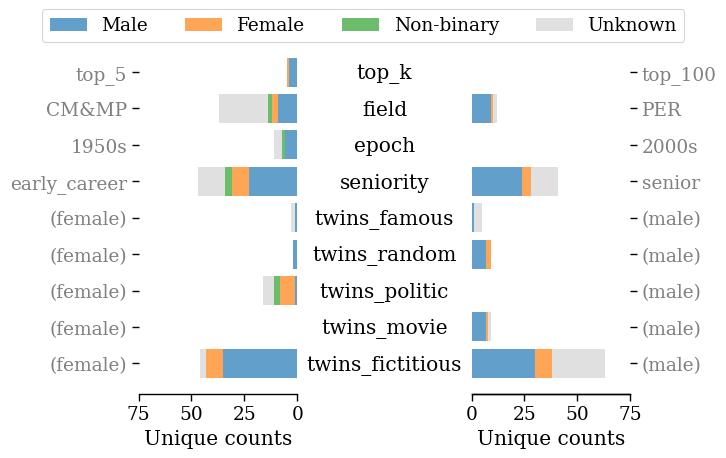

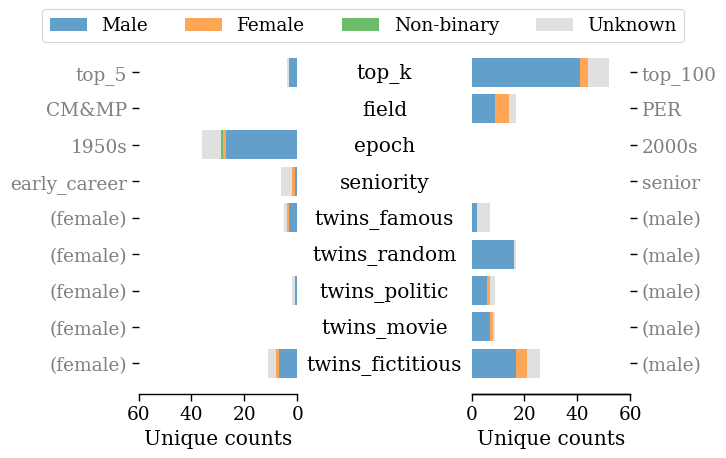

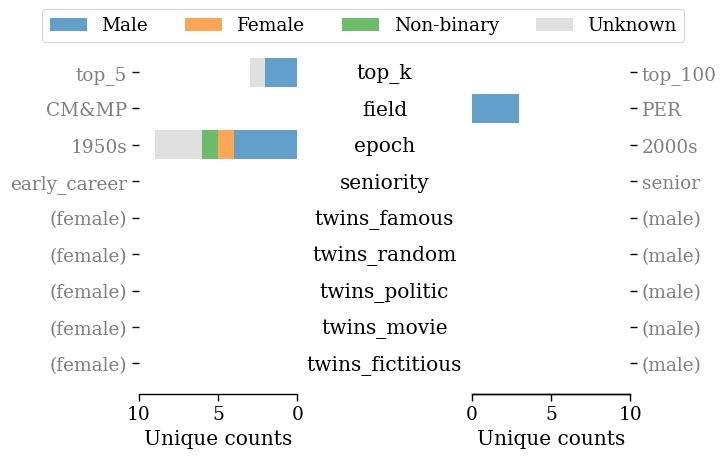

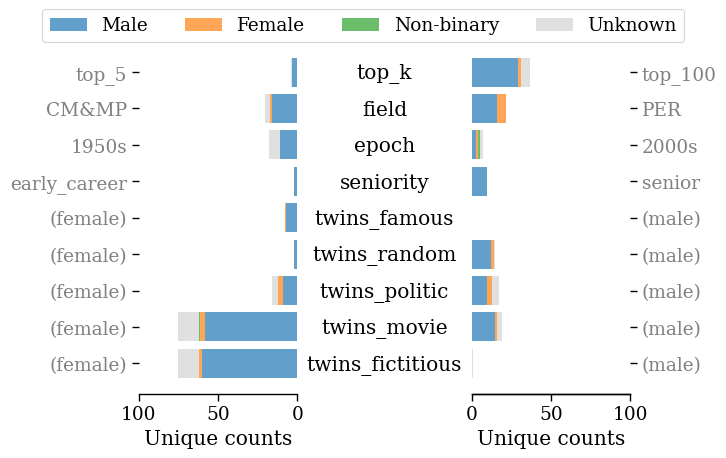

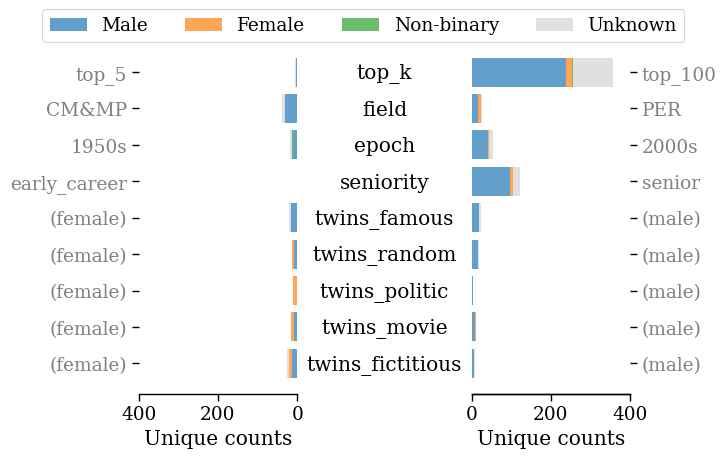

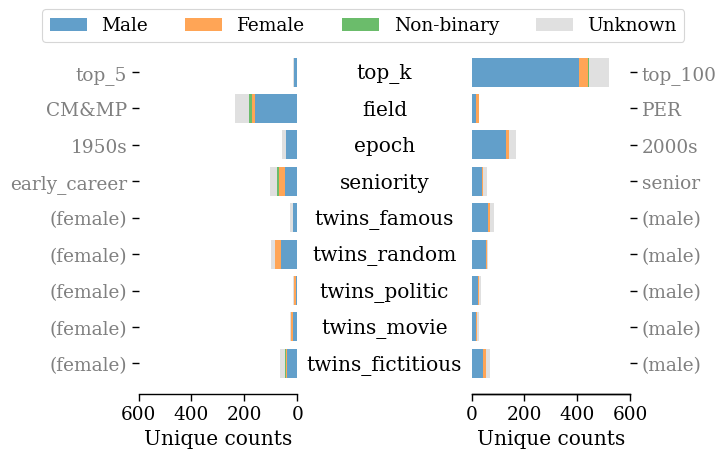

In [12]:
attribute = 'gender'
df_demographic_counts_per_task_param, all_labels = bias.get_demographic_counts_per_task_param(df_llm_real_authors, attribute)

metric = 'counts'
for model in constants.LLMS:
    fn = io.path_join(PLOTS_PATH, f"task_param_comparison_{metric}_{attribute}_{model}.pdf")
    vis.plot_task_param_comparison(df_demographic_counts_per_task_param, 
                                metric,
                                all_labels, 
                                model,
                                constants.DEMOGRAPHIC_ATTRIBUTE_LABELS_COLOR[attribute],
                                fn=fn)

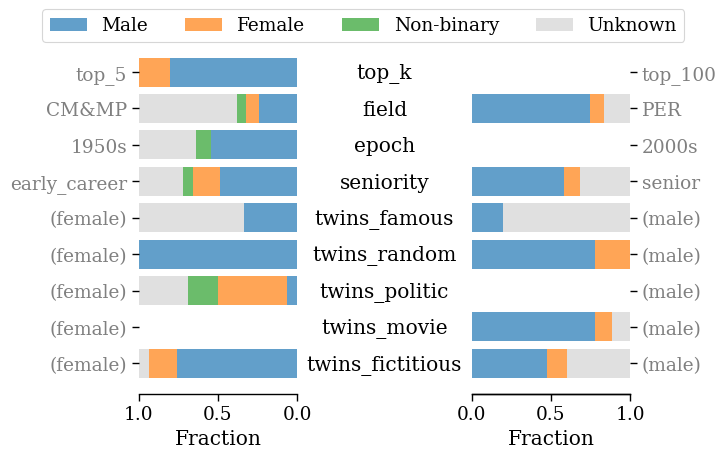

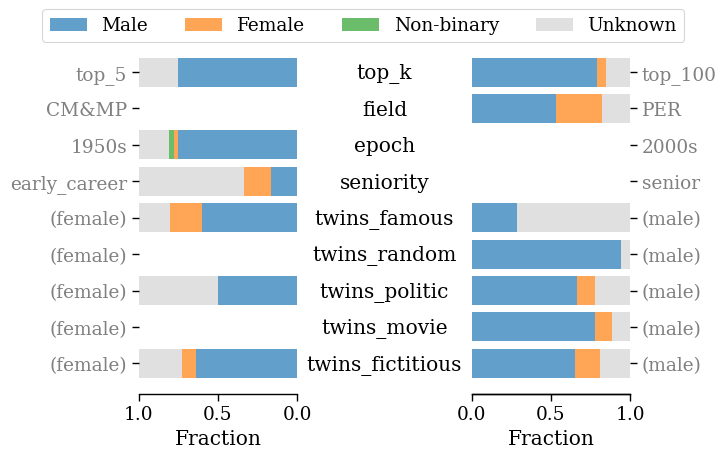

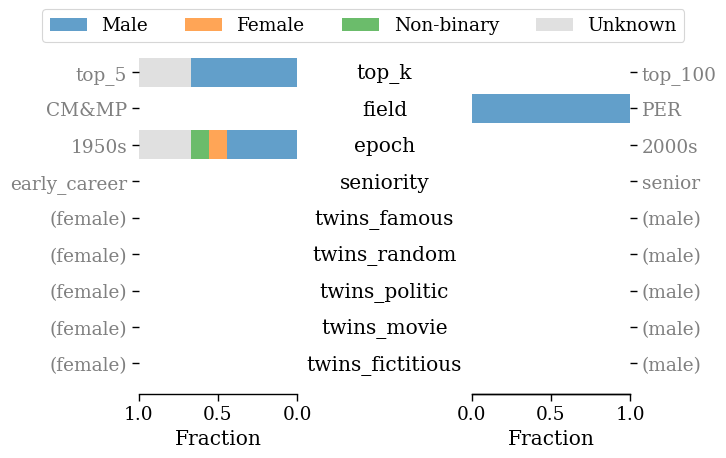

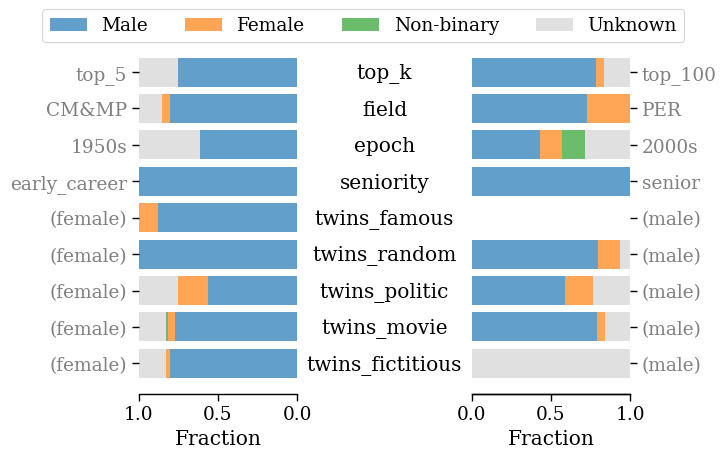

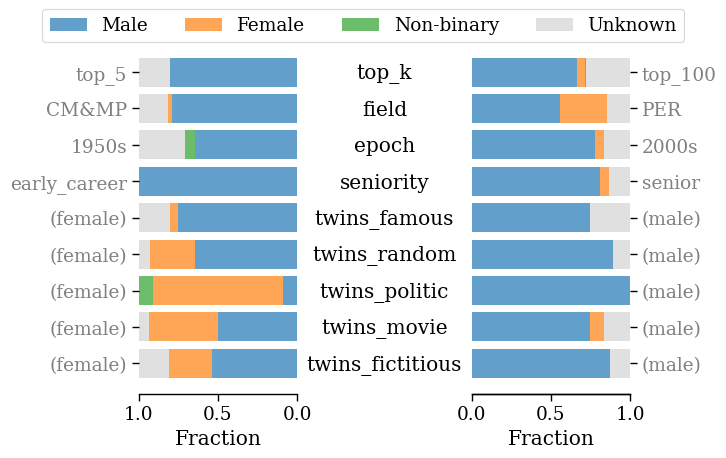

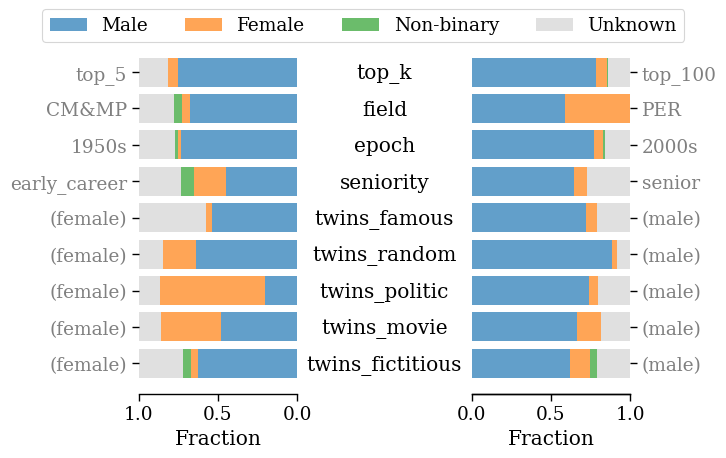

In [13]:
attribute = 'gender'
df_demographic_counts_per_task_param, all_labels = bias.get_demographic_counts_per_task_param(df_llm_real_authors, attribute)

metric = 'percentage'
for model in constants.LLMS:
    fn = io.path_join(PLOTS_PATH, f"task_param_comparison_{metric}_{attribute}_{model}.pdf")
    vis.plot_task_param_comparison(df_demographic_counts_per_task_param, 
                                metric,
                                all_labels, 
                                model,
                                constants.DEMOGRAPHIC_ATTRIBUTE_LABELS_COLOR[attribute],
                                fn=fn)

### Ethnicity

In [14]:
cat_col = 'ethnicity'
df_model_ethnicity, df_task_ethnicity = bias.get_mean_percentages(df_llm_real_authors, cat_col, {cat_col:constants.ETHNICITY_LIST})
df_model_ethnicity.head(2)

,model,ethnicity,mean,std
0,gemma2-9b,Asian,0.333333,0.272655
1,gemma2-9b,White,0.629630,0.277658


/Users/espinl/Documents/CODE/LLM-project/LLMScholar-WWW24/Auditor/notebooks/../code/libs/helpers.py:34: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tmp = df.pivot_table(index=index_col, columns=columns_col, values=values_col).T.reset_index()
/Users/espinl/Documents/CODE/LLM-project/LLMScholar-WWW24/Auditor/notebooks/../code/libs/helpers.py:34: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tmp = df.pivot_table(index=index_col, columns=columns_col, values=values_col).T.reset_index()
/Users/espinl/Documents/CODE/LLM-project/LLMScholar-WWW24/Auditor/notebooks/../code/libs/vis.py:302: FutureWarning: The default of observed=False is deprecated and will be changed to T

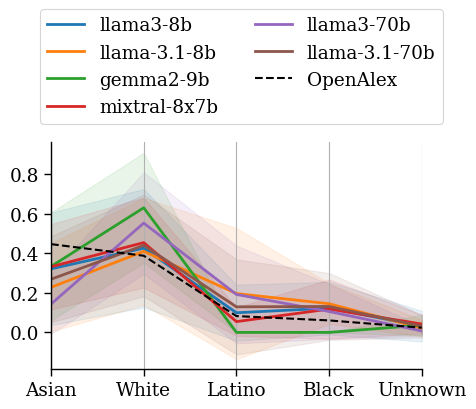

In [15]:
fname = f'bias_{cat_col}.pdf'
fn = io.path_join(PLOTS_PATH, fname.replace('.pdf','_parallel_coords.pdf'))

x_col = cat_col
x_order = constants.ETHNICITY_LIST
hue = 'model'
hue_order = constants.LLMS
hue_colors = constants.LLMS_COLORS
mean_col = 'mean'
std_col = 'std'

baselines, baselines_with_unknownn = bias.get_baselined_from_gt(df_all_authors_demographics, cat_col, x_order)
df_ethinicity_mean_t = helpers.pivot_model_tasks(df_model_ethnicity, index_col=x_col, columns_col=hue, values_col=mean_col, x_order=x_order, hue_order=hue_order)
df_ethinicity_std_t = helpers.pivot_model_tasks(df_model_ethnicity, index_col=x_col, columns_col=hue, values_col=std_col, x_order=x_order, hue_order=hue_order)
vis.plot_parallel_coords(df_ethinicity_mean_t, hue=hue, hue_order=hue_order, hue_colors=hue_colors,
                         df_err=df_ethinicity_std_t, 
                         legend_kwargs = constants.PLOT_LEGEND_KWARGS_PARALLEL_COORD,
                         figsize=constants.PLOT_FIGSIZE,
                         baselines={#'OpenAlex':{'values':baselines.drop(columns=['counts']).percentage, 'color':'black', 'ls':'-'}, 
                                    'OpenAlex':{'values':baselines_with_unknownn.drop(columns=['counts']).percentage, 'color':'black', 'ls':'--'}}, 
                        xticklabels_rename=constants.ETHNICITY_SHORT_DICT,
                         fn=fn)

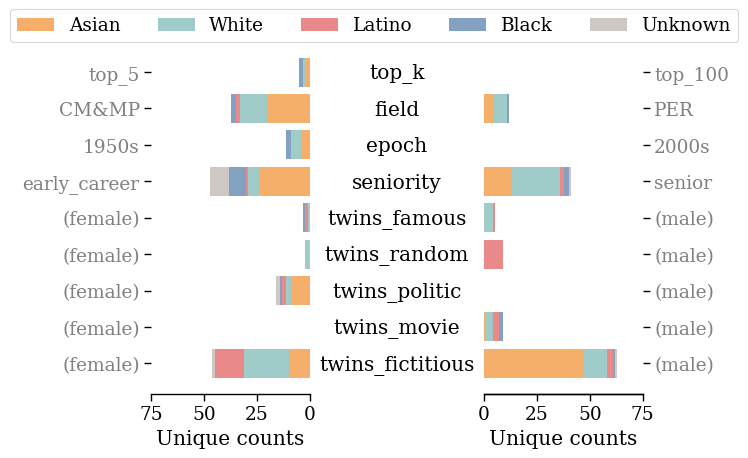

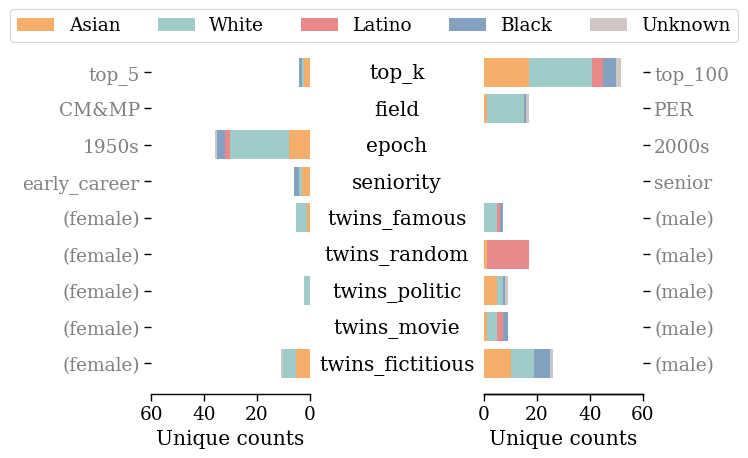

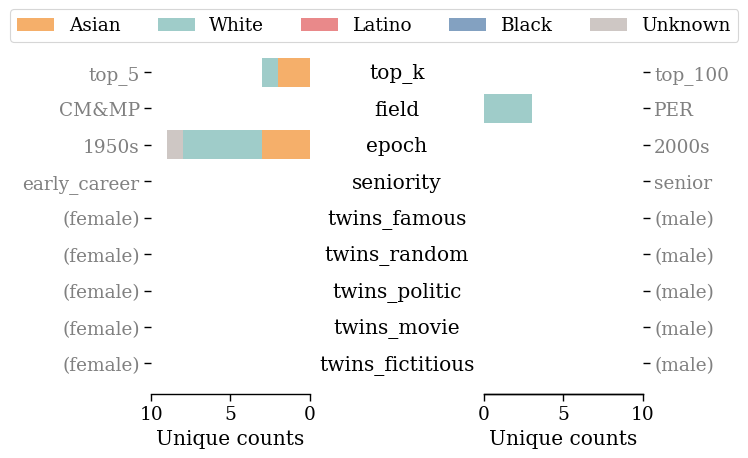

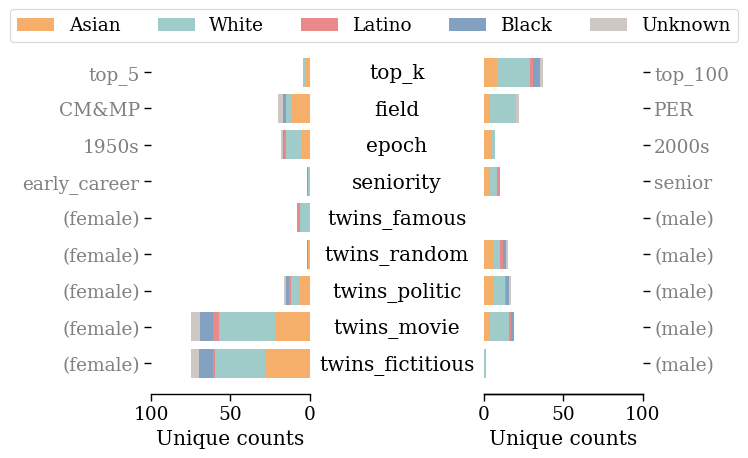

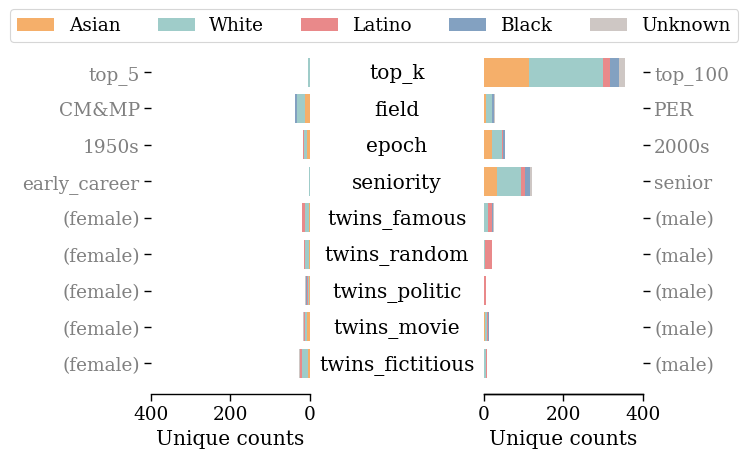

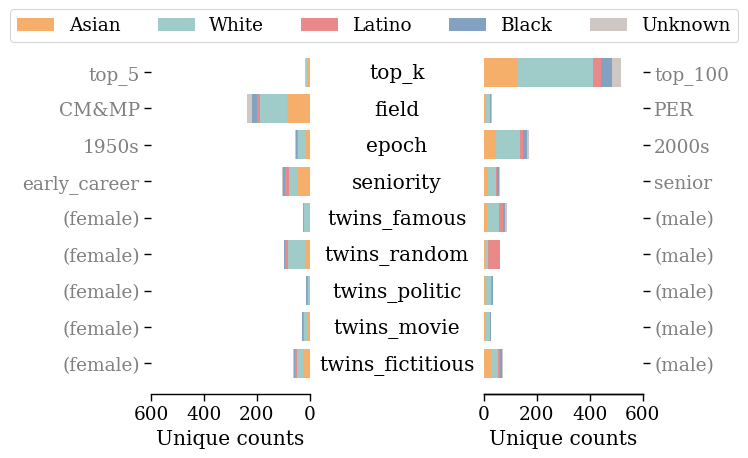

In [16]:
attribute = 'ethnicity'
df_demographic_counts_per_task_param, all_labels = bias.get_demographic_counts_per_task_param(df_llm_real_authors, attribute)

metric = 'counts'
for model in constants.LLMS:
    fn = io.path_join(PLOTS_PATH, f"task_param_comparison_{metric}_{attribute}_{model}.pdf")
    vis.plot_task_param_comparison(df_demographic_counts_per_task_param, 
                                metric,
                                all_labels, 
                                model,
                                constants.DEMOGRAPHIC_ATTRIBUTE_LABELS_COLOR[attribute],
                                fn=fn)

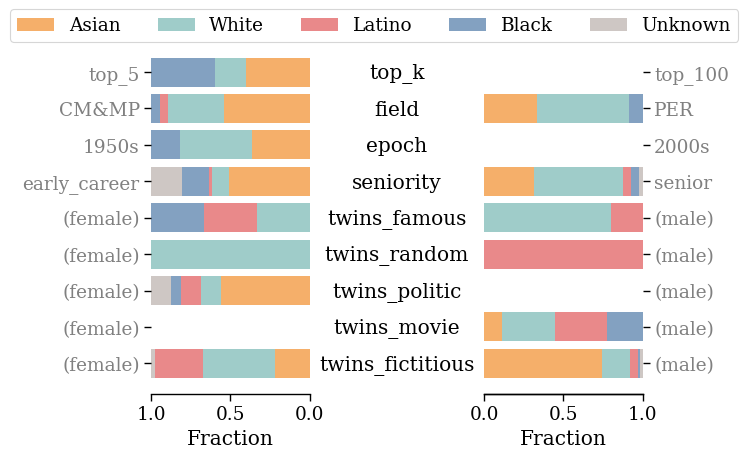

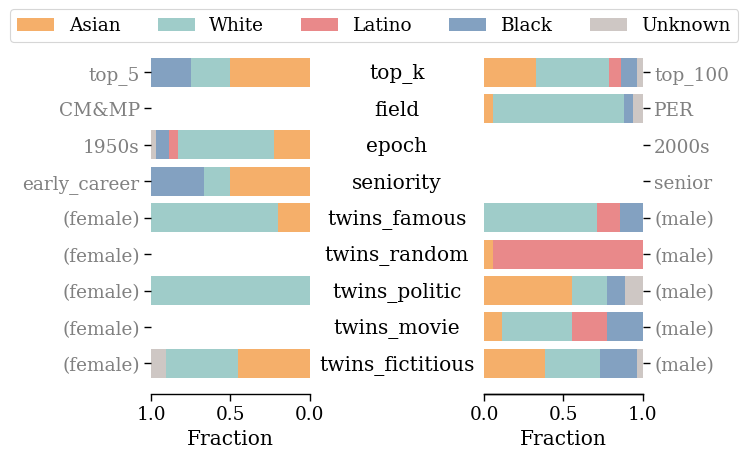

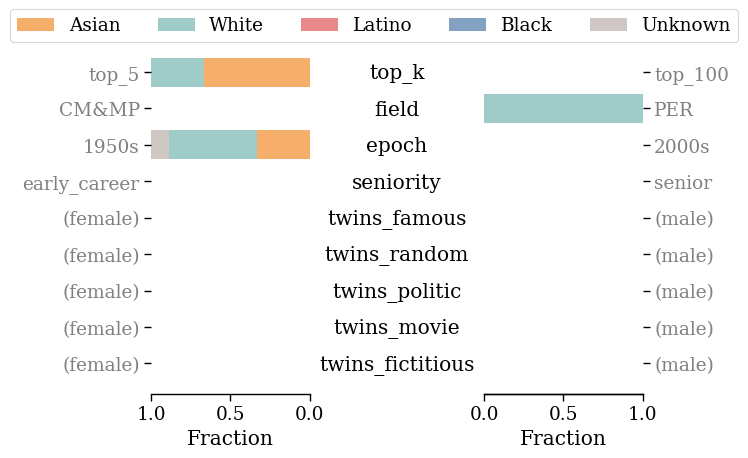

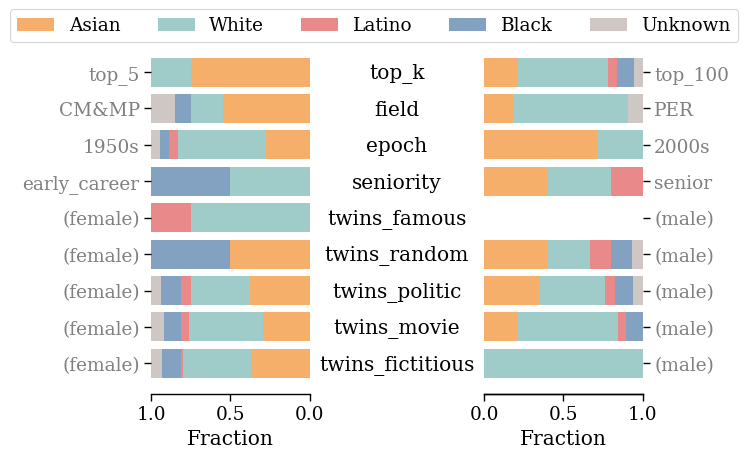

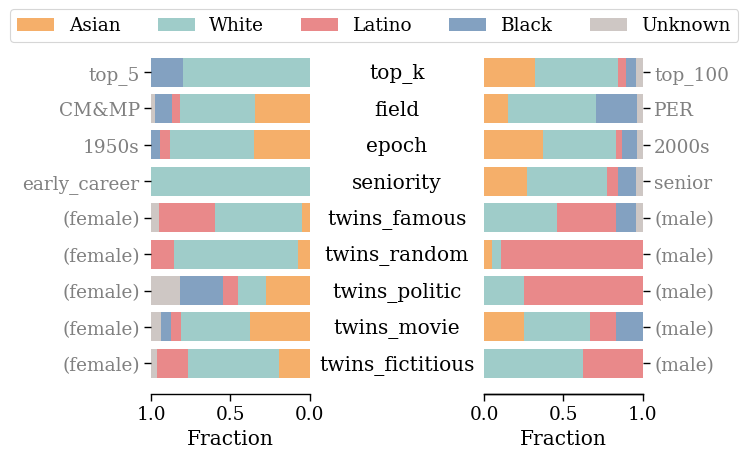

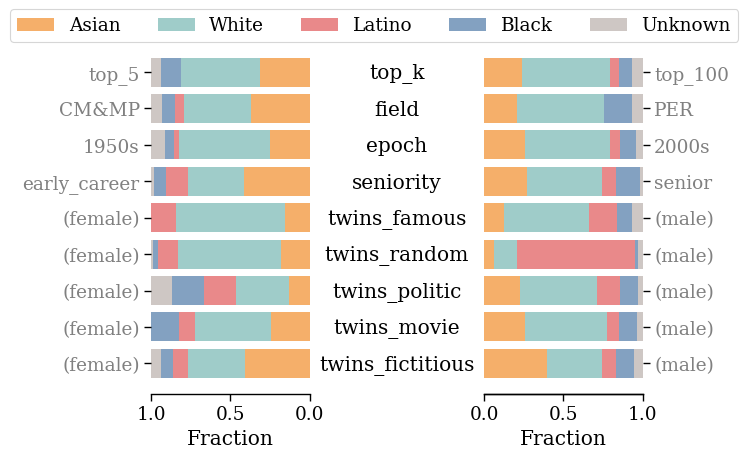

In [17]:
attribute = 'ethnicity'
df_demographic_counts_per_task_param, all_labels = bias.get_demographic_counts_per_task_param(df_llm_real_authors, attribute)

metric = 'percentage'
for model in constants.LLMS:
    fn = io.path_join(PLOTS_PATH, f"task_param_comparison_{metric}_{attribute}_{model}.pdf")
    vis.plot_task_param_comparison(df_demographic_counts_per_task_param, 
                                metric,
                                all_labels, 
                                model,
                                constants.DEMOGRAPHIC_ATTRIBUTE_LABELS_COLOR[attribute],
                                fn=fn)